In [81]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Import data set
sat_2019 = pd.read_csv('data/sat_2019.csv')
for i in sat_2019.columns:
    if i != 'State':
        sat_2019 = sat_2019.rename(columns={i:i.lower()+'_2019'})
    else:
        sat_2019 = sat_2019.rename(columns={i:i.lower()})
sat_2018 = pd.read_csv('data/sat_2018.csv')
for i in sat_2018.columns:
    if i != 'State':
        sat_2018 = sat_2018.rename(columns={i:i.lower()+'_2018'})
    else:
        sat_2018 = sat_2018.rename(columns={i:i.lower()})
sat_2017 = pd.read_csv('data/sat_2017.csv')
for i in sat_2017.columns:
    if i != 'State':
        sat_2017 = sat_2017.rename(columns={i:i.lower()+'_2017'})
    else:
        sat_2017 = sat_2017.rename(columns={i:i.lower()})

In [84]:
# Merging dataframes to all_data
first_2 = pd.merge(sat_2017,sat_2018, on='state',how='inner')
all_data = pd.merge(first_2,sat_2019, on='state',how='inner')

In [85]:
def find_loc(item,column):
    loc = 0
    for i in all_data[column]:
        if i == item:
            return loc
        else:
            loc += 1
            
    return False

In [86]:
def get_state_participation(state):
    loc = find_loc(state,'state')
    return [float(all_data['participation_2017'][loc].strip('%'))/100,
            float(all_data['participation_2018'][loc].strip('%'))/100,
            float(all_data['participation rate_2019'][loc].strip('%'))/100]

In [87]:
def calculate_part_change():
    df = pd.DataFrame()
    for i in all_data['state']:
        change = get_state_participation(i)
        change_1 = change[1]-change[0]
        change_2 = change[2]-change[1]
        change_o = change[2]-change[0]
        new_row = pd.Series(data = {
                'pc(2017-2018)': change_1,
                'pc(2018-2019)': change_2,
                'pc(overall)': change_o},
                name=i)
        df = df.append(new_row,ignore_index=False)
    return df
d = calculate_part_change()
print(d)

                      pc(2017-2018)  pc(2018-2019)  pc(overall)
Alabama                        0.01           0.01         0.02
Alaska                         0.05          -0.02         0.03
Arizona                       -0.01           0.02         0.01
Arkansas                       0.02           0.01         0.03
California                     0.07           0.03         0.10
Colorado                       0.89           0.00         0.89
Connecticut                    0.00           0.00         0.00
Delaware                       0.00           0.00         0.00
District of Columbia          -0.08           0.02        -0.06
Florida                       -0.27           0.44         0.17
Georgia                        0.09           0.01         0.10
Hawaii                         0.01          -0.02        -0.01
Idaho                          0.07           0.00         0.07
Illinois                       0.90           0.01         0.91
Indiana                        0.00     

In [137]:
# States that experienced the biggest positive change in participation rate
d.sort_values(ascending=False,by='pc(overall)')

,pc(2017-2018),pc(2018-2019),pc(overall)
Illinois,0.90,0.01,0.91
Colorado,0.89,0.00,0.89
West Virginia,0.14,0.71,0.85
Rhode Island,0.26,0.03,0.29
South Carolina,0.05,0.13,0.18
Florida,-0.27,0.44,0.17
Oklahoma,0.01,0.14,0.15
Maryland,0.07,0.06,0.13
New Jersey,0.12,0.00,0.12
New York,0.12,0.00,0.12


In [128]:
# States that experienced the biggest negative change in participation rate
d.sort_values(ascending=True,by='pc(overall)').head()

,pc(2017-2018),pc(2018-2019),pc(overall)
District of Columbia,-0.08,0.02,-0.06
Nevada,-0.03,-0.03,-0.06
Hawaii,0.01,-0.02,-0.01
New Hampshire,0.00,-0.01,-0.01
Montana,0.00,-0.01,-0.01


In [88]:
# displaying first 5 rows of all_data
all_data.head()

,state,participation_2017,evidence-based reading and writing_2017,math_2017,total_2017,participation_2018,evidence-based reading and writing_2018,math_2018,total_2018,participation rate_2019,ebrw_2019,math_2019,total_2019
0,Alabama,5%,593,572,1165,6%,595,571,1166,7%,583,560,1143
1,Alaska,38%,547,533,1080,43%,562,544,1106,41%,556,541,1097
2,Arizona,30%,563,553,1116,29%,577,572,1149,31%,569,565,1134
3,Arkansas,3%,614,594,1208,5%,592,576,1169,6%,582,559,1141
4,California,53%,531,524,1055,60%,540,536,1076,63%,534,531,1065


In [89]:
# checking for # of rows and colummns
all_data.shape

(51, 13)

In [90]:
# checking for missing values; returning the sum of all missing values per column
all_data.isnull().sum()

state                                      0
participation_2017                         0
evidence-based reading and writing_2017    0
math_2017                                  0
total_2017                                 0
participation_2018                         0
evidence-based reading and writing_2018    0
math_2018                                  0
total_2018                                 0
participation rate_2019                    0
ebrw_2019                                  0
math_2019                                  0
total_2019                                 0
dtype: int64

In [91]:
# results indicate no missing values present in all_data

In [92]:
# data types of each feature:
all_data.dtypes

state                                      object
participation_2017                         object
evidence-based reading and writing_2017     int64
math_2017                                   int64
total_2017                                  int64
participation_2018                         object
evidence-based reading and writing_2018     int64
math_2018                                   int64
total_2018                                  int64
participation rate_2019                    object
ebrw_2019                                   int64
math_2019                                   int64
total_2019                                  int64
dtype: object

In [93]:
all_data.describe

<bound method NDFrame.describe of                    state participation_2017  \
0                Alabama                 5%   
1                 Alaska                38%   
2                Arizona                30%   
3               Arkansas                 3%   
4             California                53%   
5               Colorado                11%   
6            Connecticut               100%   
7               Delaware               100%   
8   District of Columbia               100%   
9                Florida                83%   
10               Georgia                61%   
11                Hawaii                55%   
12                 Idaho                93%   
13              Illinois                 9%   
14               Indiana                63%   
15                  Iowa                 2%   
16                Kansas                 4%   
17              Kentucky                 4%   
18             Louisiana                 4%   
19                 Maine  

In [94]:
# states with the lowest participation rates have higher test scores; top students of those states may be more likely to be the only students taking  the test

In [95]:
sat_2019 = sat_2019.rename(columns= {"State":"state", "Participation Rate":"participation rate","EBRW":"ebrw", "Math": "math", "Total":"total"})

In [96]:
all_data

,state,participation_2017,evidence-based reading and writing_2017,math_2017,total_2017,participation_2018,evidence-based reading and writing_2018,math_2018,total_2018,participation rate_2019,ebrw_2019,math_2019,total_2019
0,Alabama,5%,593,572,1165,6%,595,571,1166,7%,583,560,1143
1,Alaska,38%,547,533,1080,43%,562,544,1106,41%,556,541,1097
2,Arizona,30%,563,553,1116,29%,577,572,1149,31%,569,565,1134
3,Arkansas,3%,614,594,1208,5%,592,576,1169,6%,582,559,1141
4,California,53%,531,524,1055,60%,540,536,1076,63%,534,531,1065
5,Colorado,11%,606,595,1201,100%,519,506,1025,100%,518,506,1024
6,Connecticut,100%,530,512,1041,100%,535,519,1053,100%,529,516,1046
7,Delaware,100%,503,492,996,100%,505,492,998,100%,499,486,985
8,District of Columbia,100%,482,468,950,92%,497,480,977,94%,495,480,975
9,Florida,83%,520,497,1017,56%,550,549,1099,100%,516,483,999


In [97]:
act_2019 = pd.read_csv('data/act_2019.csv')
for i in act_2019.columns:
    if i != 'State':
        act_2019 = act_2019.rename(columns={i:i.lower()+'_2019'})
    else:
        act_2019 = act_2019.rename(columns={i:i.lower()})
act_2018 = pd.read_csv('data/act_2018.csv')
for i in act_2018.columns:
    if i != 'State':
        act_2018 = act_2018.rename(columns={i:i.lower()+'_2018'})
    else:
        act_2018 = act_2018.rename(columns={i:i.lower()})
act_2017 = pd.read_csv('data/act_2017.csv')
for i in act_2017.columns:
    if i != 'State':
        act_2017 = act_2017.rename(columns={i:i.lower()+'_2017'})
    else:
        act_2017 = act_2017.rename(columns={i:i.lower()})

In [98]:
act_2017.head()

,state,participation_2017,english_2017,math_2017,reading_2017,science_2017,composite_2017
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [99]:
act_2018.head()

,state,participation_2018,composite_2018
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [100]:
act_2019.head()

,state,participation_2019,composite_2019
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [101]:
# Removing several columns in act_2017 to have them match with the columns in act_2018 and act_2019
act_2017.drop(['english_2017', 'math_2017', 'reading_2017', 'science_2017'], axis = 1).head()

,state,participation_2017,composite_2017
0,National,60%,21.0
1,Alabama,100%,19.2
2,Alaska,65%,19.8
3,Arizona,62%,19.7
4,Arkansas,100%,19.4


In [114]:
import pandas as pd

def format_df(c,year):
    df = pd.read_csv(c)
    for i in df.columns:
        if i != 'State':
            df = df.rename(columns={i:i.lower()+'_'+str(year)})
        else:
            df = df.rename(columns={i:i.lower()})
            for i in df['state']:
                df.loc[df['state']==i, 'state'] = i.strip('.')
    return df

sat_2019 = format_df('data/sat_2019.csv',2019)
sat_2018 = format_df('data/sat_2018.csv',2018)
sat_2017 = format_df('data/sat_2017.csv',2017)
funding_2019 = format_df('data/funding_2019.csv',2019)
funding_2018 = format_df('data/funding_2018.csv',2018)
funding_2017 = format_df('data/funding_2017.csv',2017)

first_2 = pd.merge(sat_2017,sat_2018, on='state',how='inner')
all_data = pd.merge(first_2,sat_2019, on='state',how='inner')

first_4 = pd.merge(all_data,funding_2019,on='state',how='outer')
first_5 = pd.merge(first_4,funding_2018,on='state',how='outer')
complete = pd.merge(first_5,funding_2017,on='state',how='outer')

,state,participation_2017,evidence-based reading and writing_2017,math_2017,total_2017,participation_2018,evidence-based reading and writing_2018,math_2018,total_2018,participation rate_2019,...,total (support services)_2019,total (other functions)_2019,total funding_2018,total (instruction)_2018,total (support services)_2018,total (other functions)_2018,total funding_2017,total (instruction)_2017,total (support services)_2017,total (other functions)_2017
0,Alabama,5%,593,572,1165,6%,595,571,1166,7%,...,"2,725,761","633,620","7,327,918","4,102,597","2,617,440","607,881","7,208,823","4,046,379","2,556,496","605,948"
1,Alaska,38%,547,533,1080,43%,562,544,1106,41%,...,"1,039,457","94,863","2,362,970","1,261,678","1,006,989","94,303","2,375,700","1,266,077","1,013,896","95,727"
2,Arizona,30%,563,553,1116,29%,577,572,1149,31%,...,"3,242,963","534,339","7,735,586","4,147,850","3,079,664","508,072","7,631,469","4,081,153","3,051,375","498,941"
3,Arkansas,3%,614,594,1208,5%,592,576,1169,6%,...,"1,899,313","297,002","4,899,604","2,750,549","1,857,747","291,308","4,806,717","2,691,959","1,824,239","290,519"
4,California,53%,531,524,1055,60%,540,536,1076,63%,...,"29,204,613","4,557,271","76,818,689","44,661,882","27,818,003","4,338,804","76,532,039","44,748,095","27,572,412","4,211,532"
5,Colorado,11%,606,595,1201,100%,519,506,1025,100%,...,"4,033,876","429,935","9,168,278","5,080,485","3,672,762","415,031","8,774,348","4,893,184","3,475,055","406,109"
6,Connecticut,100%,530,512,1041,100%,535,519,1053,100%,...,"3,885,538","365,780","10,509,454","6,381,617","3,772,514","355,323","9,924,891","6,183,084","3,360,805","381,002"
7,Delaware,100%,503,492,996,100%,505,492,998,100%,...,"674,811","155,254","1,954,576","1,186,054","628,532","139,990","1,920,661","1,167,635","619,504","133,522"
8,District of Columbia,100%,482,468,950,92%,497,480,977,94%,...,"519,283","51,312","1,175,381","714,285","408,547","52,549","1,146,951","665,476","432,742","48,733"
9,Florida,83%,520,497,1017,56%,550,549,1099,100%,...,"9,179,703","1,974,254","26,855,594","16,232,076","8,710,194","1,913,324","25,995,086","15,671,515","8,440,670","1,882,901"


In [ ]:
complete = pd.DataFrame({
    'State': ['Illinois', 'West Virginia', 'Colorado'],
    'Age': [45, 38, 90],
    'Height(in cm)': [150, 180, 160]
})

In [148]:
#Merging Data

import pandas as pd

def format_df(c,year):
    df = pd.read_csv(c)
    for i in df.columns:
        if i != 'State':
            df = df.rename(columns={i:i.lower()+'_'+str(year)})
        else:
            df = df.rename(columns={i:i.lower()})
            for i in df['state']:
                df.loc[df['state']==i, 'state'] = i.strip('.')
    return df

sat_2019 = format_df('data/sat_2019.csv',2019)
sat_2018 = format_df('data/sat_2018.csv',2018)
sat_2017 = format_df('data/sat_2017.csv',2017)
funding_2019 = format_df('data/funding_2019.csv',2019)
funding_2018 = format_df('data/funding_2018.csv',2018)
funding_2017 = format_df('data/funding_2017.csv',2017)

first_2 = pd.merge(sat_2017,sat_2018, on='state',how='inner')
all_data = pd.merge(first_2,sat_2019, on='state',how='inner')

first_4 = pd.merge(all_data,funding_2019,on='state',how='outer')
first_5 = pd.merge(first_4,funding_2018,on='state',how='outer')
complete = pd.merge(first_5,funding_2017,on='state',how='outer')

def find_loc(df,item,column):
    loc = 0
    for i in df[column]:
        if i == item:
            return loc
        else:
            loc += 1
            
    return False

def get_state_participation(state):
    loc = find_loc(all_data,state,'state')
    return [float(all_data['participation_2017'][loc].strip('%'))/100,
            float(all_data['participation_2018'][loc].strip('%'))/100,
            float(all_data['participation rate_2019'][loc].strip('%'))/100]

def calculate_part_change():
    df = pd.DataFrame()
    for i in all_data['state']:
        change = get_state_participation(i)
        change_1 = change[1]-change[0]
        change_2 = change[2]-change[1]
        change_o = change[2]-change[0]
        new_row = pd.Series(data = {
                'pc(2017-2018)': change_1,
                'pc(2018-2019)': change_2,
                'pc(overall)': change_o},
                name=i)
        df = df.append(new_row,ignore_index=False)
    return df
d = calculate_part_change()

In [141]:
complete['total funding_2019'][find_loc(complete,'Illinois','state')]

'31,796,646'

In [139]:
complete['total funding_2018'][find_loc(complete,'Illinois','state')]

'31,796,646'

In [140]:
complete['total funding_2017'][find_loc(complete,'Illinois','state')]

'31,365,804'

In [ ]:
complete = complete.drop(['English', 'Math', 'Reading', 'Science'], axis = 1)

In [ ]:
act_2017 = act_2017.drop(['English', 'Math', 'Reading', 'Science'], axis = 1)

Text(0.5, 1.0, 'Change in SAT Participation Rate 2017-2019')

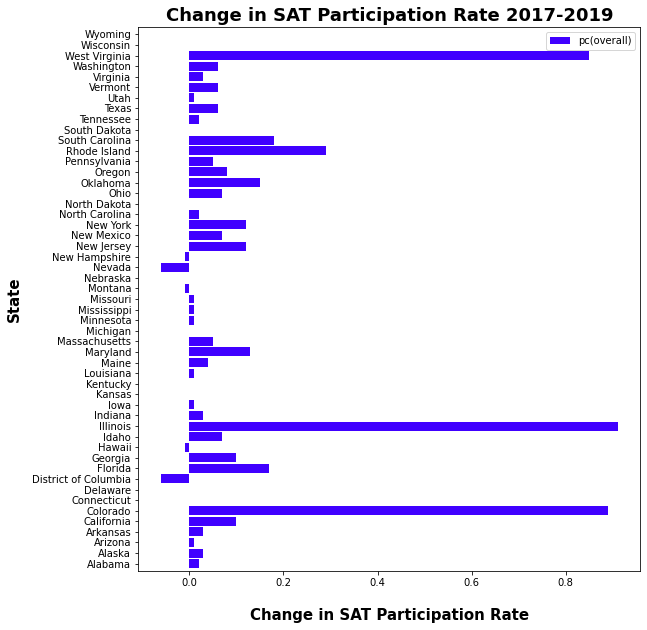

In [205]:
ax = d.plot(kind='barh', figsize=(9, 10), color='#4000ff', zorder=2, width=.85)
ax.set_xlabel('Change in SAT Participation Rate', labelpad=20, weight='bold', size=15)
ax.set_ylabel('State', labelpad=10, weight='bold', size=15)
ax.set_title ('Change in SAT Participation Rate 2017-2019', weight='bold', size=18)


In [142]:
complete['total funding_2019'][find_loc(complete,'Colorado','state')]

'9,909,523'

In [144]:
complete['total funding_2018'][find_loc(complete,'Colorado','state')]

'9,168,278'

In [146]:
complete['total funding_2017'][find_loc(complete,'Colorado','state')]

'8,774,348'